<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/1104%EA%B8%88%EA%B3%BC%EC%A0%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C(175_182).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06. 피마 인디언 당뇨병 예측

## 1. 데이터셋 살펴보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [7]:
diabetes_data = pd.read_csv("/content/drive/MyDrive/PyColab_ESAA/데이터셋/diabetes.csv")
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [8]:
print(diabetes_data['Outcome'].value_counts())
# Outcome : 클래스 결정값
# 0 : Negative
# 1 : Positive

0    500
1    268
Name: Outcome, dtype: int64


In [9]:
diabetes_data.info()
# 널값이 없고 피쳐의타입은 모두 숫자형 (정수, 실수)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 2. 머신러닝 예측모델 수립 및 평가

In [12]:
# confusion, accuracy, precision, recall 등의 평가를 한꺼번에 호출하는 함수 

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  # ROC-AUC 추가ㅎ
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  # ROC_AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1: .4f}, 재현율: {2:4f}, F1: {3: .4f}, AUC: {4:.4f}'
  .format(accuracy, precision, recall, f1, roc_auc))

In [10]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝 Outcome 칼럼을 레이블 값y로, 칼럼 위치 -1을 이용해 추출

X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

In [13]:
# 로지스틱 회귀로 학습, 예측, 평가

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도:  0.7209, 재현율: 0.574074, F1:  0.6392, AUC: 0.7919


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [30]:
# 정밀도와 재현율의 임계값에 따른 값 변화를 곡선형태 그래프로 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  #X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary=thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precsion')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  #threshold 값 X축의 Scale을 0.1 단위로 변경
  start, end=plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  #x축, y축 label과 legend, grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend( ); plt.grid()
  plt.show()

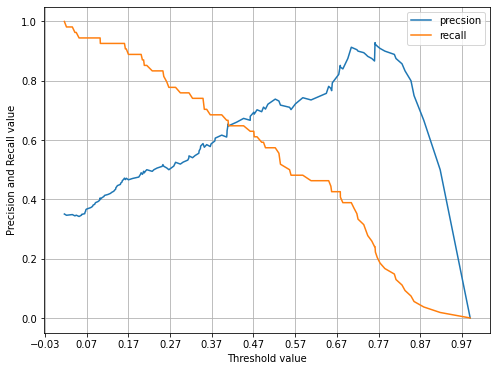

In [31]:
# 재현율 곡선을 보고
# 임계값 별 정밀도와 재현율 변화

pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

* 재현율 곡선에서, 임계값을 0.42 정도로 낮추면 정밀도와 재현율이 어느정도 균형 맞춘다.
* 하지만 두개의 지표 모두 0.7이 안되는 수치
* 임계값을 인위적으로 조작하기 전에 다시 데이터 값으 점검해야함.

In [32]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* min값이 0 으로 돼있는 피처가 많다. 이상하다.
* min값이 0 으로 돼있는 피처에 대해 0값의 건수, 전체 건수 대비 몇퍼센트 비율로 존재하는 지 확인해야 함

In [33]:
#0값을 검사할 피처 명 리스트
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

#전체 데이터 건수
total_count=diabetes_data['Glucose'].count()

#피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
  zero_count=diabetes_data[diabetes_data[feature]==0][feature].count()
  print('{0} 건수는 {1},퍼센트는 {2:.2f} %'.format(feature,zero_count,100*zero_count/total_count))

Glucose 건수는 5,퍼센트는 0.65 %
BloodPressure 건수는 35,퍼센트는 4.56 %
SkinThickness 건수는 227,퍼센트는 29.56 %
Insulin 건수는 374,퍼센트는 48.70 %
BMI 건수는 11,퍼센트는 1.43 %


* SkinThickness, Insulin 의 0값은 각각 전체의 29%, 48%로 대단히 많다.
* 전체 데이터 건수가 많지 않기 때문에 삭제하지 않고, 평균값으로 대체

In [34]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features=diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,mean_zero_features)

In [35]:
#0값을 평균값으로 대체한 데이터셋에 피처스케일링을 적용해 변환
#숫자 데이터에 스케일링 적용한 뒤 학습/데이터 세트로 나누고 로지스틱 회귀를 적용해 성능 평가 지표 확인

X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

#StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=156,stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lf_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도:  0.7674, 재현율: 0.611111, F1:  0.6804, AUC: 0.8433


전 : 정확도: 0.7727, 정밀도:  0.7209, 재현율: 0.574074, F1:  0.6392, AUC: 0.7919  
후 : 정확도: 0.7987, 정밀도:  0.7674, 재현율: 0.611111, F1:  0.6804, AUC: 0.8433

* 성능 수치가 일정 수준 개선됨.
* 하지만 여전히 재현율 수치는 개선이 필요함.
* 분류 결정 임계값을 변화시키면서 재현율 값의 성능 수치가 어느정도 개선되는지 보자.

In [36]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
  #thresholds list 객체 내의 값을 차례로 iteraction 하면서 evaluation 수행
  for custom_threshold in thresholds:
    binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict=binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test,custom_predict,pred_proba_c1)

In [37]:
#임곗값에 따른 평가 수치 출력은 앞에서 사용한 get_eval_by_threshold() 함수 이용
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.3
오차행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도:  0.5658, 재현율: 0.796296, F1:  0.6615, AUC: 0.8433
임곗값: 0.33
오차행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도:  0.6000, 재현율: 0.777778, F1:  0.6774, AUC: 0.8433
임곗값: 0.36
오차행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도:  0.6190, 재현율: 0.722222, F1:  0.6667, AUC: 0.8433
임곗값: 0.39
오차행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도:  0.6333, 재현율: 0.703704, F1:  0.6667, AUC: 0.8433
임곗값: 0.42
오차행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도:  0.6923, 재현율: 0.666667, F1:  0.6792, AUC: 0.8433
임곗값: 0.45
오차행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도:  0.7059, 재현율: 0.666667, F1:  0.6857, AUC: 0.8433
임곗값: 0.48
오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도:  0.7447, 재현율: 0.648148, F1:  0.6931, AUC: 0.8433
임곗값: 0.5
오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도:  0.7674, 재현율: 0.611111, F1:  0.6804, AUC: 0.8433


In [39]:
#임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

#위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환.
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test,pred_th_048,pred_proba[:,1])

오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도:  0.7447, 재현율: 0.648148, F1:  0.6931, AUC: 0.8433
